In [1]:
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
from torchvision import transforms
import numpy as np
from PIL import Image

In [2]:
def binarize(im, thres=100):
    tmp = np.array(im)
    tmp[tmp >= thres] = 255
    tmp[tmp < thres] = 0
    return Image.fromarray(tmp)

im = Image.open('Lenna.png')
# to grayscale
im = im.convert('L')
im = im.resize((im.size[0]//2, im.size[1]//2))
im = binarize(im)

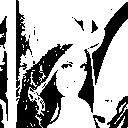

In [3]:
im

# Apply a kernel
 
- Identity filter
 
stride=1 which preserves original image sizes.

In [4]:
conv = nn.ConvTranspose2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)

kernel = np.array([[
    [
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.]
    ]
]])

conv.weight = Parameter(torch.from_numpy(kernel).float(), requires_grad=False)

In [5]:
im_tensor = transforms.ToTensor()(im).unsqueeze(0)
convolved_im_tensor = conv.forward(im_tensor)

In [6]:
convolved_im = convolved_im_tensor.cpu().squeeze(0)
im1 = transforms.ToPILImage()(convolved_im)

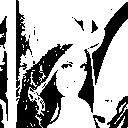

In [7]:
im1

 # Next, apply kernels
 
 - Laplacian filter
 - Identity filter
 
 stride=2 which increases image sizes.
 
 dilation=1

In [8]:
conv = nn.ConvTranspose2d(1, 1, kernel_size=3, stride=2, padding=1, bias=False)

kernel = np.array([[
    [
        [1.,  1., 1.],
        [1., -8., 1.],
        [1.,  1., 1.]
    ],
    [
        [0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.]
    ]
]])

conv.weight = Parameter(torch.from_numpy(kernel).float(), requires_grad=False)

In [9]:
im_tensor = transforms.ToTensor()(im).unsqueeze(0)
convolved_im_tensor = conv.forward(im_tensor)

In [10]:
convolved_im = convolved_im_tensor.cpu().squeeze(0)
im2 = transforms.ToPILImage()(convolved_im[0])
im3 = transforms.ToPILImage()(convolved_im[1])

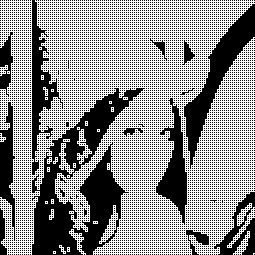

In [11]:
im2

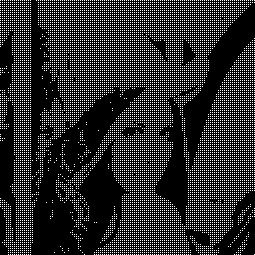

In [12]:
im3

dilation=2

which should recover the Laplacian filter to a small degree.

In [13]:
conv = nn.ConvTranspose2d(1, 1, kernel_size=3, stride=2, padding=1, bias=False, dilation=2)
conv.weight = Parameter(torch.from_numpy(kernel).float(), requires_grad=False)

In [14]:
im_tensor = transforms.ToTensor()(im).unsqueeze(0)
convolved_im = conv.forward(im_tensor).cpu().squeeze(0)
im4 = transforms.ToPILImage()(convolved_im[0])
im5 = transforms.ToPILImage()(convolved_im[1])

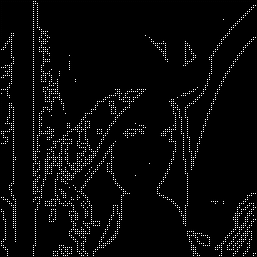

In [15]:
im4

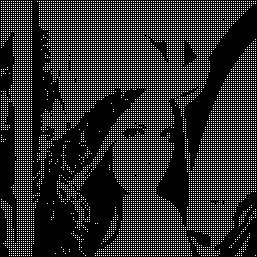

In [16]:
im5